In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import networkx as nx

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1.2
mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['font.family'] = 'sans-serif'
cm_colors = plt.get_cmap('Set2')


0.64365 0.6323863636363637 0.6775174603174602 0.724321928460342 0.7464046511627905 0.7506031331592691
ibm_torino-v1 0.7464046511627905 6
ibm_fez 0.7506031331592691 6
ibm_fez-fractional 0.7713253012048192 10
ibm_torino-fractional 0.7789720930232554 8
ibm_marrakesh-fractional 0.7552637215528782 9


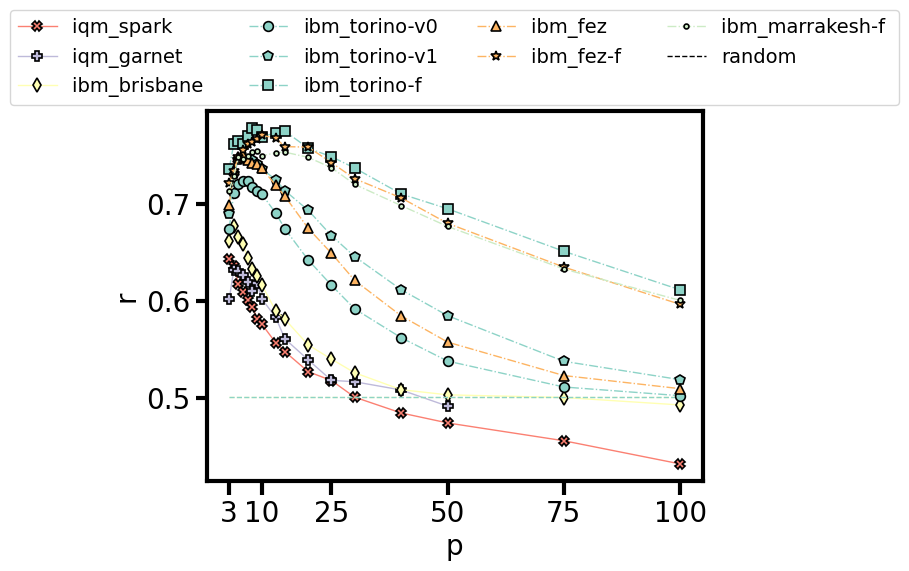

In [14]:
ibm_brisbane = np.load("./Data/ibm_brisbane/127_HE_day2.npy", allow_pickle=True).item()
ibm_torino = np.load("./Data/ibm_torino/133_HE.npy", allow_pickle=True).item()
ibm_torino_v1 = np.load("./Data/ibm_torino/133_HE_v1.npy", allow_pickle=True).item()
ibm_torino_fractional = np.load("./Data/ibm_torino/133_HE_fractional.npy", allow_pickle=True).item()

ibm_fez = np.load("./Data/ibm_fez/156_HE.npy", allow_pickle=True).item()
ibm_fez_fractional = np.load("./Data/ibm_fez/156_HE_fractional.npy", allow_pickle=True).item()
ibm_marrakesh_fractional = np.load("./Data/ibm_marrakesh/156_HE_fractional.npy", allow_pickle=True).item()


iqm_garnet = np.load("./Data/iqm_garnet/20_SQ.npy", allow_pickle=True).item()
iqm_spark = np.load("./Data/iqm_spark/5_SQ.npy", allow_pickle=True).item()

colors = plt.get_cmap("Set3")
delta = 1
case = ""
prop = "r"
fig, ax = plt.subplots()
ps = iqm_spark["ps"][1:]
ax.plot(ps, [iqm_spark["postprocessing"+case][1][p][prop] for p in ps], label ="iqm_spark ", markeredgecolor="black", markersize=7, color=colors(3), marker="X")
ps = iqm_garnet["ps"]
ax.plot(ps, [iqm_garnet["postprocessing"+case][1][p][0][prop] for p in ps], label ="iqm_garnet ", markeredgecolor="black", markersize=7, color=colors(2), marker="P")
ps = ibm_brisbane["ps"]
ax.plot(ps, [ibm_brisbane["postprocessing"+case][1][p][prop] for p in ps], label ="ibm_brisbane ", markeredgecolor="black", markersize=7, color=colors(1), marker="d")
ax.plot(ps, len(ps)*[ibm_brisbane["random"+case][prop]], linestyle="--", color=colors(1))
ps = ibm_torino["ps"]
ax.plot(ps, len(ps)*[ibm_torino["random"+case][prop]], linestyle="--", color=colors(0))
ax.plot(ps, [ibm_torino["postprocessing"+case][1][p][prop] for p in ps], marker="o", label ="ibm_torino-v0", markeredgecolor="black", markersize=7, color=colors(0), linestyle="-.")
ax.plot(ps, [ibm_torino_v1["postprocessing"+case][1][p][prop] for p in ps], marker="p", label ="ibm_torino-v1", markeredgecolor="black", markersize=7, color=colors(0), linestyle="-.")
ax.plot(ps, [ibm_torino_fractional["postprocessing"+case][0.75][p][prop] for p in ps], marker="s", label ="ibm_torino-f", markeredgecolor="black", markersize=7, color=colors(0), linestyle="-.")

ax.plot(ps, [ibm_fez["postprocessing"+case][1][p][prop] for p in ps], label ="ibm_fez ", markeredgecolor="black", markersize=7, color=colors(5), linestyle="-.", marker="^")
ax.plot(ps, [ibm_fez_fractional["postprocessing"+case][0.75][p][prop] for p in ps], label ="ibm_fez-f ", markeredgecolor="black", markersize=7, color=colors(5), linestyle="-.", marker="*")

ax.plot(ps, [ibm_marrakesh_fractional["postprocessing"+case][0.75][p][prop] for p in ps], label ="ibm_marrakesh-f ", markeredgecolor="black", markersize=7, color=colors(10), linestyle="-.", marker=".")

print(max([iqm_spark["postprocessing"+case][1][p][prop] for p in ps]),
      max([iqm_garnet["postprocessing"+case][1][p][0][prop] for p in iqm_garnet["ps"]]),
      max([ibm_brisbane["postprocessing"+case][1][p][prop] for p in ps]),
      max([ibm_torino["postprocessing"+case][1][p][prop] for p in ps]),
      max([ibm_torino_v1["postprocessing"+case][1][p][prop] for p in ps]),
      max([ibm_fez["postprocessing"+case][1][p][prop] for p in ps]),
      )
print("ibm_torino-v1", max([ibm_torino_v1["postprocessing"+case][1][p][prop] for p in ps]), ps[np.argmax([ibm_torino_v1["postprocessing"+case][1][p][prop] for p in ps])])
print("ibm_fez", max([ibm_fez["postprocessing"+case][1][p][prop] for p in ps]), ps[np.argmax([ibm_fez["postprocessing"+case][1][p][prop] for p in ps])])
print("ibm_fez-fractional", max([ibm_fez_fractional["postprocessing"+case][0.75][p][prop] for p in ps]), ps[np.argmax([ibm_fez_fractional["postprocessing"+case][0.75][p][prop] for p in ps])])

print("ibm_torino-fractional", max([ibm_torino_fractional["postprocessing"+case][0.75][p][prop] for p in ps]), ps[np.argmax([ibm_torino_fractional["postprocessing"+case][0.75][p][prop] for p in ps])])
print("ibm_marrakesh-fractional", max([ibm_marrakesh_fractional["postprocessing"+case][0.75][p][prop] for p in ps]), ps[np.argmax([ibm_marrakesh_fractional["postprocessing"+case][0.75][p][prop] for p in ps])])

extra = "fractional"
ax.plot([],[], label ="random" ,color="black", linestyle="--")
ax.legend(loc="upper center", bbox_to_anchor=(0.5,1.3), ncol=4)
ax.set_ylabel("r")
ax.set_xlabel("p")
ax.set_xticks([3, 10, 25, 50, 75, 100])
fig.savefig(f"./Figures/NL/comparison_eagle_heron{case}_{prop}{extra}.pdf", bbox_inches="tight", transparent=True)

ibm_torino 0.7729069767441857 8
ibm_fez 0.7822663989290496 15
ibm_marrakesh 0.7716532797858099 15


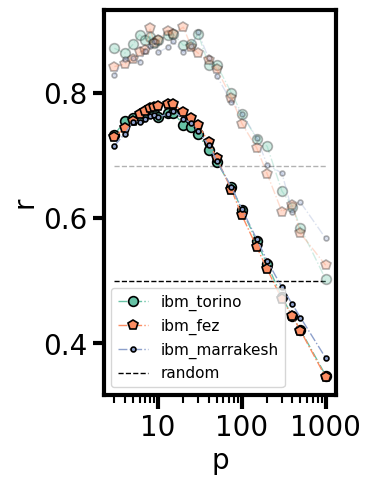

In [16]:
ibm_torino = np.load("./Data/ibm_torino/133_HE_fractional_1000.npy", allow_pickle=True).item()
ibm_fez = np.load("./Data/ibm_fez/156_HE_fractional_1000.npy", allow_pickle=True).item()
ibm_marrakesh = np.load("./Data/ibm_marrakesh/156_HE_fractional_1000.npy", allow_pickle=True).item()

color = plt.get_cmap("Set3")
fig, ax = plt.subplots(figsize=(3,5))
ps = ibm_fez["ps"]
# ax.plot(results["ps"][:-2], results["r"][10]["ideal"][:-2], color="black", linewidth=2, linestyle="--", label=r"noiseless")

colors = plt.get_cmap("Set2")
delta = 1
case = ""
prop = "r"

ps = ibm_torino["ps"]
n2q = ps
n2q = np.array([150*i for i in ibm_torino["ps"]])
delta = 0.75
ax.plot(ps, len(ps)*[ibm_torino["random"+case][prop]], linestyle="--", color="black")

ax.plot(ps, [ibm_torino["postprocessing"+case][delta][p][prop] for p in ps], marker="o", label ="ibm_torino", markeredgecolor="black", markersize=7, color=colors(0), linestyle="-.")
ax.plot(ps, [ibm_fez["postprocessing"+case][delta][p][prop] for p in ps], marker="p", label ="ibm_fez", markeredgecolor="black", markersize=7, color=colors(1), linestyle="-.")
ax.plot(ps, [ibm_marrakesh["postprocessing"+case][0.75][p][prop] for p in ps], marker=".", label ="ibm_marrakesh", markeredgecolor="black", markersize=7, color=colors(2), linestyle="-.")
ax.plot(ps, [max(ibm_torino["postprocessing"+case][delta][p]["results"][:,1]) for p in ps], marker="o", markeredgecolor="black", markersize=7, color=colors(0), linestyle="-.", alpha=0.3)
ax.plot(ps, [max(ibm_fez["postprocessing"+case][delta][p]["results"][:,1]) for p in ps], marker="p", markeredgecolor="black", markersize=7, color=colors(1), linestyle="-.", alpha=0.3)
ax.plot(ps, [max(ibm_marrakesh["postprocessing"+case][delta][p]["results"][:,1]) for p in ps], marker=".", markeredgecolor="black", markersize=7, color=colors(2), linestyle="-.", alpha=0.3)

ax.plot(ps, len(ps)*[max(ibm_torino["random"+case]["results"][:,1])], linestyle="--", color="black", alpha=0.3)

print("ibm_torino", max([ibm_torino["postprocessing"+case][delta][p][prop] for p in ps]), ps[np.argmax([ibm_torino["postprocessing"+case][delta][p][prop] for p in ps])])
print("ibm_fez", max([ibm_fez["postprocessing"+case][delta][p][prop] for p in ps]), ps[np.argmax([ibm_fez["postprocessing"+case][delta][p][prop] for p in ps])])
print("ibm_marrakesh", max([ibm_marrakesh["postprocessing"+case][delta][p][prop] for p in ps]), ps[np.argmax([ibm_fez["postprocessing"+case][delta][p][prop] for p in ps])])

extra = "fractional"
ax.plot([],[], label ="random" ,color="black", linestyle="--")
ax.legend(fontsize=11, loc=3)
ax.set_ylabel("r")
ax.set_xlabel("p")
ax.set_xscale("log")
ax.set_xticks([10,100,1000])
ax.set_xticklabels([10,100,1000])

# ax.set_xticks([3, 10, 25, 50, 75, 100])
fig.savefig(f"./Figures/NL/Heron_p1000.pdf", bbox_inches="tight", transparent=True)

ibm_torino-v1 0.7464046511627905 6
ibm_torino-fractional 0.7789720930232554 8


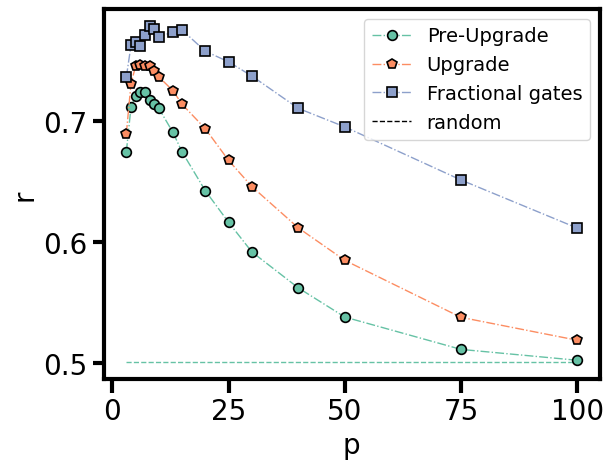

In [18]:
ibm_torino = np.load("./Data/ibm_torino/133_HE.npy", allow_pickle=True).item()
ibm_torino_v1 = np.load("./Data/ibm_torino/133_HE_v1.npy", allow_pickle=True).item()
ibm_torino_fractional = np.load("./Data/ibm_torino/133_HE_fractional.npy", allow_pickle=True).item()
case = "same_brisbane"
name = "raw"
results = np.load(f"../TheMagicSchedule/Data/Noisy_sim/probabilities_{case}_{name}_depolarizing.npy", allow_pickle=True).item()

color = plt.get_cmap("Set3")
fig, ax = plt.subplots()
ps = results["ps"]
# ax.plot(results["ps"][:-2], results["r"][10]["ideal"][:-2], color="black", linewidth=2, linestyle="--", label=r"noiseless")

colors = plt.get_cmap("Set2")
delta = 1
case = ""
prop = "r"

ps = ibm_torino["ps"]
n2q = ps
n2q = np.array([150*i for i in ibm_torino["ps"]])

ax.plot(ps, len(ps)*[ibm_torino["random"+case][prop]], linestyle="--", color=colors(0))
ax.plot(ps, [ibm_torino["postprocessing"+case][1][p][prop] for p in ps], marker="o", label ="Pre-Upgrade", markeredgecolor="black", markersize=7, color=colors(0), linestyle="-.")
ax.plot(ps, [ibm_torino_v1["postprocessing"+case][1][p][prop] for p in ps], marker="p", label ="Upgrade", markeredgecolor="black", markersize=7, color=colors(1), linestyle="-.")
ax.plot(ps, [ibm_torino_fractional["postprocessing"+case][0.75][p][prop] for p in ps], marker="s", label ="Fractional gates", markeredgecolor="black", markersize=7, color=colors(2), linestyle="-.")

print("ibm_torino-v1", max([ibm_torino_v1["postprocessing"+case][1][p][prop] for p in ps]), ps[np.argmax([ibm_torino_v1["postprocessing"+case][1][p][prop] for p in ps])])
print("ibm_torino-fractional", max([ibm_torino_fractional["postprocessing"+case][0.75][p][prop] for p in ps]), ps[np.argmax([ibm_torino_fractional["postprocessing"+case][0.75][p][prop] for p in ps])])
extra = "fractional"
ax.plot([],[], label ="random" ,color="black", linestyle="--")
ax.legend()
# ax.set_title("ibm_tornio performance")
ax.set_ylabel("r")
ax.set_xlabel("p")
# ax.set_xticks([3, 10, 25, 50, 75, 100])
fig.savefig(f"./Figures/NL/comparison_heron_torino.pdf", bbox_inches="tight", transparent=True)